# Question 1

## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [27]:
df = pd.read_csv('Question_1.csv', index_col=0)

df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring              61

## Interacting with Nan value

### First Approach
As showen by above output, we have a lot of columns with a varieaty range of Nan value so I decidecd to first drop the columns which Nan value is less than few thersholds of total number of rows. The resean behind this thershold is to not lose a lot of our data. After that drop Nan value row from our dataframes. 

After considering our problem and the amout of features we have, I use the 90 percent thershold since it saves a lot of rows and their data from removing.

In [29]:
df_70_percent = df.dropna(thresh=df.shape[0]*0.7, axis=1)
df_80_percent = df.dropna(thresh=df.shape[0]*0.8, axis=1)
df_90_percent = df.dropna(thresh=df.shape[0]*0.9, axis=1)

print("Number of columns in original dataframe: ", df.shape[1])
print("Number of columns in 70% dataframe: ", df_70_percent.shape[1])
print("Number of columns in 80% dataframe: ", df_80_percent.shape[1])
print("Number of columns in 90% dataframe: ", df_90_percent.shape[1])

Number of columns in original dataframe:  21
Number of columns in 70% dataframe:  15
Number of columns in 80% dataframe:  14
Number of columns in 90% dataframe:  13


### First Approach

In [30]:
df = df_90_percent.dropna().copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          37065 non-null  float64
 1   cap-shape             37065 non-null  object 
 2   cap-surface           37065 non-null  object 
 3   cap-color             37065 non-null  object 
 4   does-bruise-or-bleed  37065 non-null  object 
 5   gill-attachment       37065 non-null  object 
 6   gill-color            37065 non-null  object 
 7   stem-height           37065 non-null  float64
 8   stem-width            37065 non-null  float64
 9   stem-color            37065 non-null  object 
 10  has-ring              37065 non-null  object 
 11  ring-type             37065 non-null  object 
 12  habitat               37065 non-null  object 
 13  season                37065 non-null  object 
 14  class                 37065 non-null  object 
dtypes: float64(3), object(12

### Second Approach

In [22]:
selected_df = df_90_percent.copy()
cat_cols = selected_df.select_dtypes(include=['object']).columns
num_cols = selected_df.select_dtypes(include=[np.number]).columns

for col in cat_cols:
    selected_df[col].fillna(selected_df[col].mode()[0], inplace=True)

for col in num_cols:
    selected_df[col].fillna(selected_df[col].median(), inplace=True)

df = selected_df
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-color             61069 non-null  object 
 3   does-bruise-or-bleed  61069 non-null  object 
 4   gill-color            61069 non-null  object 
 5   stem-height           61069 non-null  float64
 6   stem-width            61069 non-null  float64
 7   stem-color            61069 non-null  object 
 8   has-ring              61069 non-null  object 
 9   ring-type             61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
 12  class                 61069 non-null  object 
dtypes: float64(3), object(10)
memory usage: 6.5+ MB


## Converting String features

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col]=le.fit_transform(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          37065 non-null  float64
 1   cap-shape             37065 non-null  int64  
 2   cap-surface           37065 non-null  int64  
 3   cap-color             37065 non-null  int64  
 4   does-bruise-or-bleed  37065 non-null  int64  
 5   gill-attachment       37065 non-null  int64  
 6   gill-color            37065 non-null  int64  
 7   stem-height           37065 non-null  float64
 8   stem-width            37065 non-null  float64
 9   stem-color            37065 non-null  int64  
 10  has-ring              37065 non-null  int64  
 11  ring-type             37065 non-null  int64  
 12  habitat               37065 non-null  int64  
 13  season                37065 non-null  int64  
 14  class                 37065 non-null  int64  
dtypes: float64(3), int64(12)

/var/folders/nz/6q94zmc53j5fs8my8npct2tm0000gn/T/ipykernel_3055/1012322534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/var/folders/nz/6q94zmc53j5fs8my8npct2tm0000gn/T/ipykernel_3055/1012322534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/var/folders/nz/6q94zmc53j5fs8my8npct2tm0000gn/T/ipykernel_3055/1012322534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

## Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

## Dealing with imblance data

In my opinion the data is relatively balanced and no need to take action open it but for the sake of the question 

In [33]:
class_count = df['class'].value_counts()
class_count

class
1.0    20121
0.0    16944
Name: count, dtype: int64

### Oversampling

We'll oversample the minority class (where the count of instances is less) to match the count of the majority class.

In [34]:
from sklearn.utils import resample


majority_class = df[df['class'] == 1]
minority_class = df[df['class'] == 0]

minority_upsampled = resample(minority_class,
                               replace=True,  
                               n_samples=len(majority_class),  
                               random_state=42)  

balanced_data = pd.concat([majority_class, minority_upsampled])

def add_noise(data, noise_level=0.01):
    noise = np.random.randn(*data.shape) * noise_level
    return data + noise

balanced_data[num_cols] = add_noise(balanced_data[num_cols], noise_level=0.05)


In [35]:
class_count = balanced_data['class'].value_counts()
class_count

# df = balanced_data

class
1.0    20121
0.0    20121
Name: count, dtype: int64

## Split data into Train and Test

In [36]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (29652, 14) (29652,)
Test set shape: (7413, 14) (7413,)


## Random Forest 

### Training

In [37]:
import time
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier()
start = time.time()
rf_classifier.fit(X_train, y_train)
end = time.time()
training_time = end - start
print("Training Time for Random Forest Model: ", training_time)

Training Time for Random Forest Model:  1.2181172370910645


### Prediction

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

start = time.time()

y_pred = rf_classifier.predict(X_test)

end = time.time()

prediction_time = end - start
print("Prediction Time for Random Forest Model: ", prediction_time)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')
rf_f1 = f1_score(y_test, y_pred, average='macro')

print("Random Forest Model Metrics:")
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)


Prediction Time for Random Forest Model:  0.050688982009887695
Random Forest Model Metrics:
Accuracy:  0.9997302036962094
Precision:  0.9997271910682657
Recall:  0.9997271910682657
F1 Score:  0.9997271910682657


### Plotting Metrics

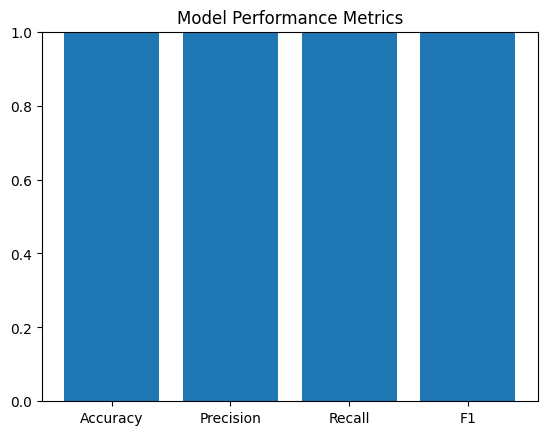

In [39]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

plt.bar(metrics, values)
plt.ylim([0.0, 1.0])  
plt.title('Model Performance Metrics')
plt.show()

### Confusion Matrix

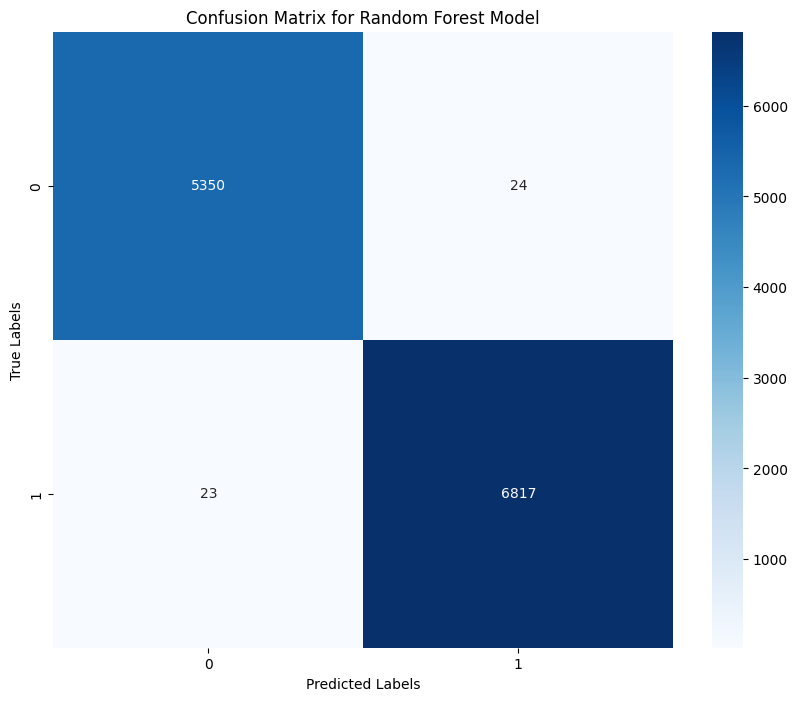

In [27]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()



### Ploting One Tree from Random Forest

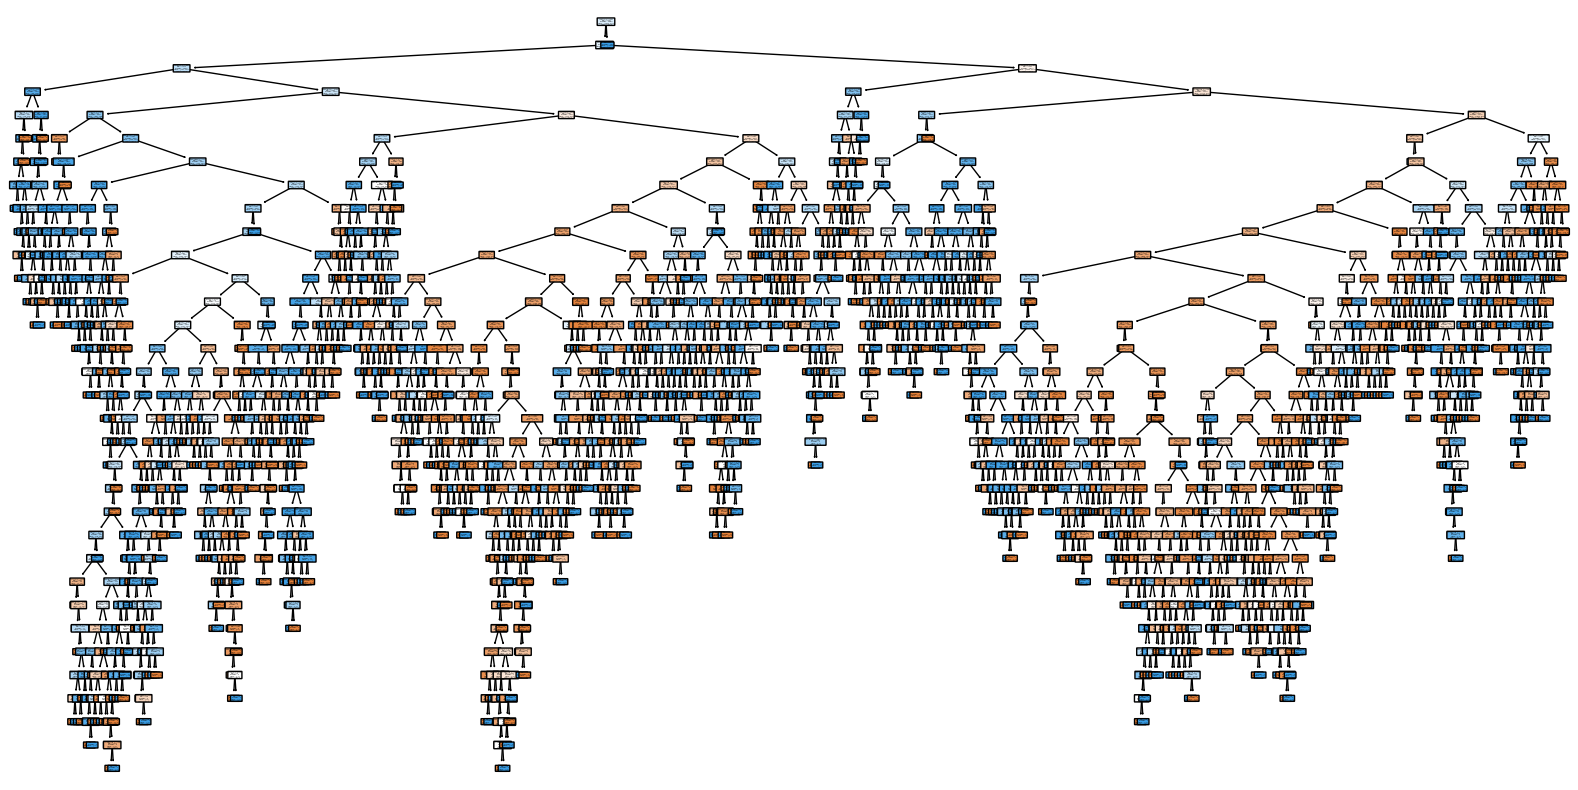

In [28]:
from sklearn.tree import plot_tree

estimator = rf_classifier.estimators_[7]

plt.figure(figsize=(20,10))
plot_tree(estimator, 
          filled=True, 
          rounded=True, 
          class_names=['Class 1', 'Class 2'], 
          feature_names=X.columns)  
plt.show()

## K-NN

### Training

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=9)

start = time.time()

knn_classifier.fit(X_train, y_train)

end = time.time()

training_time = end - start
print("Training Time for K-Nearest Neighbors Model: ", training_time)

Training Time for K-Nearest Neighbors Model:  0.028268814086914062


### Prediction

In [32]:
start = time.time()

y_pred = knn_classifier.predict(X_test)

end = time.time()

prediction_time = end - start
print("Prediction Time for K-Nearest Neighbors Model: ", prediction_time)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='macro')
knn_recall = recall_score(y_test, y_pred, average='macro')
knn_f1 = f1_score(y_test, y_pred, average='macro')

print("\nKNN metrics:")
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)

Prediction Time for K-Nearest Neighbors Model:  0.34157633781433105

KNN metrics:
Accuracy:  0.9863271655477321
Precision:  0.9861179078948711
Recall:  0.9861372821708159
F1 Score:  0.9861275881330784


### Plotting Metrics

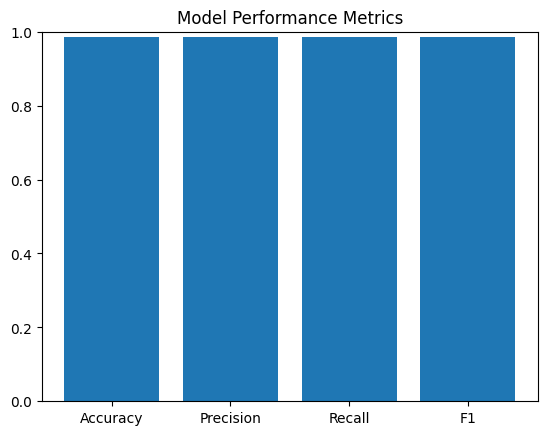

In [33]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [knn_accuracy, knn_precision, knn_recall, knn_f1]

plt.bar(metrics, values)
plt.ylim([0.0, 1.0])  
plt.title('Model Performance Metrics')
plt.show()

### Confusion Matrix

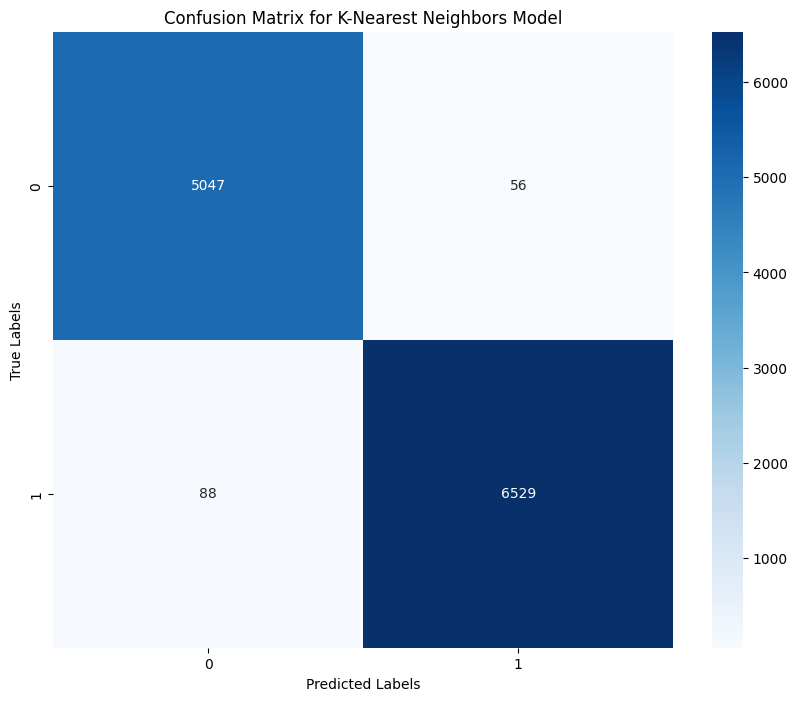

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.show()